For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

Has the network latency gone up since we switched internet service providers?

Is the website redesign any good?

Is our television ad driving more sales?

Has the network latency increased since we switched internet service providers?

Null hypothesis: The new internet service provider has not increased network latency.

Alternative hypothesis: The new internet service provider has resulted in an increase in network latency. (one-tail test)

True positive: The test rejects the null hypothesis and the network latency has increased since switching internet service providers.

True negative: The test fails to reject the null hypothesis and the network latency has not increased since switching internet providers.

False positive: The test rejects the null hypothesis but the switch to another internet service provider did not actually increase network latency.

False negative: The test fails to reject the null hypothesis but the switch to another internet service provider did increase network latency.

Does the new website design increase the average monthly rate of customers who join?

Null hypothesis: The new website design has no effect on the average monthly rate of new customers.

Alternative hypothesis: The new website design has affected the average monthly rate of new customers.

True positive: The null hypothesis is rejected and the website has actually influenced the rate of new customers per month.

True negative: The test fails to reject the null hypothesis and the website indeed has no effect on the average amount of new customers per month. 

False positive: The test rejects the null hypothesis, but the website does not affect the average amount of new customers per month.

False negative: The test fails to reject the null hypothesis, but the website does indeed affect the average amount of new customers per month.

Does our television ad affect sales?

Null hypothesis: Our television ad has no effect on sales.

Alternative Hypothesis: Our television ad positively affects sales.

True positive: The test rejects the null hypothesis and the ad has positively affected sales.

True negative: The test fails to reject the null hypothesis and the ad has had no effect on sales.

False positive: The test rejects the null hypothesis but the ad does not affect sales.

False negative: The test fails to reject the null hypothesis but the ad does indeed affect sales.

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

#### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [4]:
m1 = 90
σ1 = 15
n1 = 40

m2 = 100
σ2 = 20
n2 = 50

alpha = .05

# H0: μ1 == μ2 There is no difference between the two offices in the average time it takes to sell homes.
# Ha: μ1 != μ2 There is a significant difference between the two offices in the average time it takes to sell homes.

In [5]:
t, p = stats.ttest_ind_from_stats(mean1=90, std1=15, nobs1=40, mean2=100, std2=20, nobs2=50)

In [6]:
t, p

(-2.6252287036468456, 0.01020985244923939)

In [7]:
if p < alpha:
    print('We can reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')

We can reject the null hypothesis.


#### Load the mpg dataset and use it to answer the following questions:

#### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [29]:
# H0: There is no difference in fuel efficiency between cars from 2008 and cars from 1999.
# Ha: There is a significant difference in fuel efficiency between cars from 2008 and cars from 1999.

In [8]:
df = data('mpg')

In [9]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
df.dropna()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [12]:
df['avg_mpg'] = (df.cty + df.hwy) / 2
df.avg_mpg

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: avg_mpg, Length: 234, dtype: float64

In [13]:
new_car_mpg = df[df.year == 2008].avg_mpg

In [14]:
old_car_mpg = df[df.year == 1999].avg_mpg

In [15]:
stat, pval = stats.levene(new_car_mpg, old_car_mpg)

In [16]:
if pval < .05:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


In [17]:
tmpg, pmpg = stats.ttest_ind(new_car_mpg, old_car_mpg)

In [18]:
tmpg, pmpg

(-0.21960177245940962, 0.8263744040323578)

In [19]:
if pmpg < .05:
    print('We can reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Are compact cars more fuel-efficient than the average car?

In [20]:
compact_eff = df[df['class'] == 'compact'].avg_mpg

In [21]:
avg_eff = df.avg_mpg.mean()

In [22]:
# H0: There is no difference between the fuel efficiency of compact cars compared to the average car.
# Ha: Compact cars are more efficient than the average car.

# One sample, one-tail t-test: μ of compact fuel efficiency > μ of average car

In [23]:
tfuel, pfuel = stats.ttest_1samp(compact_eff, avg_eff)

In [24]:
if pfuel/2 < alpha and tfuel > 0:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We reject the null hypothesis.


#### Do manual cars get better gas mileage than automatic cars?

In [25]:
man_mpg = df[df.trans.str.contains('manual')].avg_mpg
man_mpg

2      25.0
3      25.5
6      22.0
8      22.0
10     24.0
13     21.0
15     20.0
24     21.0
26     21.0
28     19.5
49     17.0
52     15.5
56     14.0
65     14.0
69     14.0
70     10.5
72     13.5
79     17.0
85     15.5
86     14.5
91     22.0
93     21.5
96     18.5
97     19.0
99     17.0
100    30.5
102    28.5
103    26.0
105    30.0
108    25.0
110    22.5
112    26.0
114    22.0
117    24.0
118    24.0
121    20.0
122    20.5
142    25.0
145    27.5
146    23.0
149    22.0
152    16.0
160    21.5
162    23.5
163    22.0
167    22.5
168    22.5
172    22.0
173    23.5
174    17.5
177    16.0
180    25.0
182    26.0
185    22.0
188    25.0
189    26.0
192    22.0
196    30.5
197    32.5
201    17.5
203    19.5
204    16.0
206    16.5
208    25.0
210    25.0
212    20.5
213    38.5
214    25.0
217    25.0
219    25.0
221    20.5
222    39.5
224    25.0
226    24.0
228    25.0
231    25.0
233    22.0
Name: avg_mpg, dtype: float64

In [26]:
auto_mpg = df[df.trans.str.contains('auto')].avg_mpg
auto_mpg

1      23.5
4      25.5
5      21.0
7      22.5
9      20.5
11     23.0
12     20.0
14     21.0
16     19.5
17     21.0
18     19.5
19     17.0
20     13.0
21     17.0
22     15.0
23     14.5
25     19.0
27     20.0
29     16.5
30     12.5
31     13.0
32     15.5
33     23.0
34     26.0
35     22.0
36     23.5
37     21.5
38     21.0
39     20.5
40     19.0
41     19.0
42     20.5
43     20.5
44     14.0
45     18.5
46     18.0
47     19.5
48     19.5
50     16.0
51     15.0
53     16.5
54     16.5
55     10.5
57     13.0
58     15.0
59     15.0
60     10.5
61     15.0
62     13.5
63     15.5
64     13.0
66     10.5
67     15.0
68     15.0
71     13.0
73     15.0
74     13.0
75     14.0
76     14.0
77     15.0
78     15.5
80     15.5
81     16.0
82     16.0
83     15.0
84     15.5
87     14.5
88     15.0
89     13.0
90     15.0
92     21.5
94     20.0
95     18.0
98     18.5
101    28.0
104    28.0
106    30.5
107    30.0
109    22.0
111    25.5
113    22.0
115    23.5
116    22.5
119 

In [30]:
stat, pval = stats.levene(man_mpg, auto_mpg)

In [31]:
if pval < .05:
    print('We can reject the null hypothesis of equal variance.')
else:
    print('We fail to reject the null hypothesis of equal variance.')

We fail to reject the null hypothesis of equal variance.


In [39]:
ttrans, ptrans = stats.ttest_ind(man_mpg, auto_mpg)

In [40]:
if (ptrans/2 < alpha) and (t > 0):
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

We fail to reject the null hypothesis.


#### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [315]:
import numpy as np
import pandas as pd
from math import sqrt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [316]:
df = pd.read_csv('telco_churn.csv')

In [317]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [319]:
x = df.tenure
y = df.MonthlyCharges
r, p = stats.pearsonr(x, y)
r, p

(0.2478998562861525, 4.094044991483017e-99)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


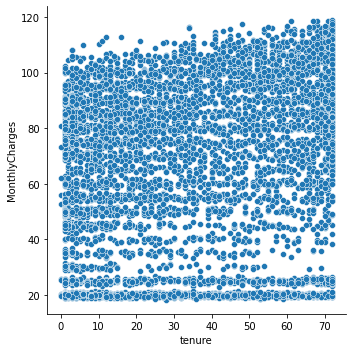

In [320]:
sns.relplot(df.tenure, df.MonthlyCharges)


In [423]:
df.TotalCharges = df.TotalCharges.str.strip().fillna('0').str.replace(' ', '')
#df.TotalCharges = df.TotalCharges.fillna(0)
#df.TotalCharges = df.TotalCharges.str.replace(np.nan,'', regex=True)
#df.TotalCharges = df[df.TotalCharges if not (pd.isnull(df.TotalCharges))]
df.TotalCharges = pd.to_numeric((df.TotalCharges), errors='coerce')


In [424]:
df = df.replace(np.nan, 0, regex=True)

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [428]:
r2, p2 = stats.pearsonr(df.tenure,df.TotalCharges)
r2, p2

(0.8261783979502475, 0.0)

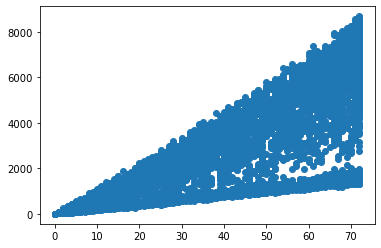

In [429]:
plt.scatter(df.tenure, df.TotalCharges)

#### Use the employees database.
#### Is there a relationship between how long an employee has been with the company and their salary?


In [323]:
import env
user = env.user
password = env.password
host = env.host
db = 'employees'

In [324]:
def get_db_url(db, env):
    if env:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return 'Access denied.'

In [325]:
access_db = get_db_url

In [399]:
query = '''SELECT e.emp_no, e.hire_date, s.salary, t.title
            FROM employees as e
            JOIN dept_emp as de ON de.emp_no = e.emp_no
            JOIN salaries as s ON s.emp_no = e.emp_no
            JOIN titles as t ON t.emp_no = s.emp_no
            WHERE de.to_date > CURDATE() LIMIT 100000;'''

In [400]:
employees = pd.read_sql(query, access_db(db, env))

In [401]:
employees.head()

,emp_no,hire_date,salary,title
0,10001,1986-06-26,60117,Senior Engineer
1,10001,1986-06-26,62102,Senior Engineer
2,10001,1986-06-26,66074,Senior Engineer
3,10001,1986-06-26,66596,Senior Engineer
4,10001,1986-06-26,66961,Senior Engineer


In [402]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     100000 non-null  int64 
 1   hire_date  100000 non-null  object
 2   salary     100000 non-null  int64 
 3   title      100000 non-null  object
dtypes: int64(2), object(2)
memory usage: 3.1+ MB


In [403]:
import datetime
import time
employees.hire_date = pd.to_datetime(employees.hire_date)


In [404]:
employees['days_emp'] = (pd.Timestamp('today') - employees['hire_date']).dt.days

In [405]:
employees.head()

,emp_no,hire_date,salary,title,days_emp
0,10001,1986-06-26,60117,Senior Engineer,13187
1,10001,1986-06-26,62102,Senior Engineer,13187
2,10001,1986-06-26,66074,Senior Engineer,13187
3,10001,1986-06-26,66596,Senior Engineer,13187
4,10001,1986-06-26,66961,Senior Engineer,13187


In [406]:

x = employees.days_emp
y = employees.salary

r, p = stats.pearsonr(x,y)

In [407]:
r,p

(0.16748517520892336, 0.0)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


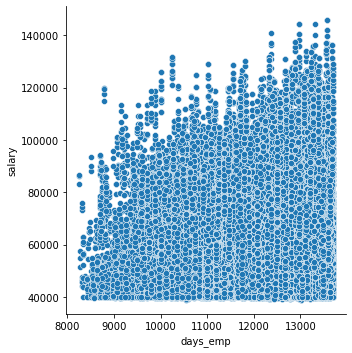

In [408]:
sns.relplot(x,y)

#### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [437]:
employees['no_titles'] = len(employees[employees.title.unique()].emp_no)

KeyError: "None of [Index(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',\n       'Assistant Engineer', 'Technique Leader'],\n      dtype='object')] are in the [columns]"

6

#### Use the sleepstudy data. Is there a relationship between days and reaction time?

In [64]:
sleep = data('sleepstudy')

In [65]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [66]:
x = sleep.Days
y = sleep.Reaction

r, p = stats.pearsonr(x,y)

In [67]:
r, p

(0.5352302262650255, 9.89409632221439e-15)

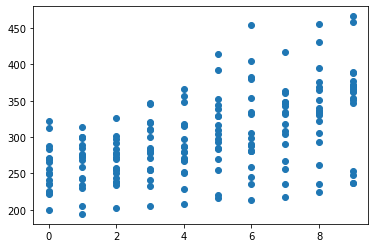

In [68]:
plt.scatter(x,y)